In [133]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D


In [123]:
def s_t (s_0, r, r_f, T, sigma, epsilon):
    
    return 1/(1/(s_0) * np.exp((r - r_f - (sigma**2)/2) * T + sigma * epsilon * np.sqrt(T) ))

def alpha (Y_T, Y_0, B_T, B_0, multiplier):

    return max(0, (Y_T - Y_0)/Y_T) + min(1, multiplier * (B_0 - B_T)/B_T)

def payment (alpha):
    '''millions'''
    # alpha = list(alpha)
    # if len(alpha) != 0:
    #     size = len(alpha)
    #     return [53 for x in range(size)] * (np.ones(size) - [0.03 for x in range(size)] - alpha)
    # else:
    return 53 * ( 1 - 0.03 - alpha)

def payment_dist (Y_0, B_0, cor, multiplier=5, size=1000):
    
    Y0 = [Y_0 for x in range(size)]
    B0 = [B_0 for x in range(size)]
    YT = np.random.normal(Y_0, (Y_0 * cor)**2, size)
    BT = np.random.normal(B_0, (B_0 * cor)**2, size)

    a_list = []
    for idx in range(len(YT)):
        a = alpha(YT[idx], Y0[idx], BT[idx], B0[idx], multiplier)
        a_list.append(a)

    payment_list = payment(a_list)

    df = pd.DataFrame(columns=['YT', 'BT', 'alpha', 'payment'])

    df['YT'] = YT
    df['BT'] = BT
    df['alpha'] = a_list
    df['payment'] = payment_list

    return df

def payment_dist2 (YT, BT, cor, multiplier=5):

    df = pd.DataFrame(columns=YT, index=BT)
    
    for x in df.index:
        for y in df.columns:
            a = alpha(y, 122, x, 25.884, 5)
            pay = payment(a)
            df.loc[x, y] = round(pay, 2)

    return df


array([[100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.],
       [100., 105., 110.,

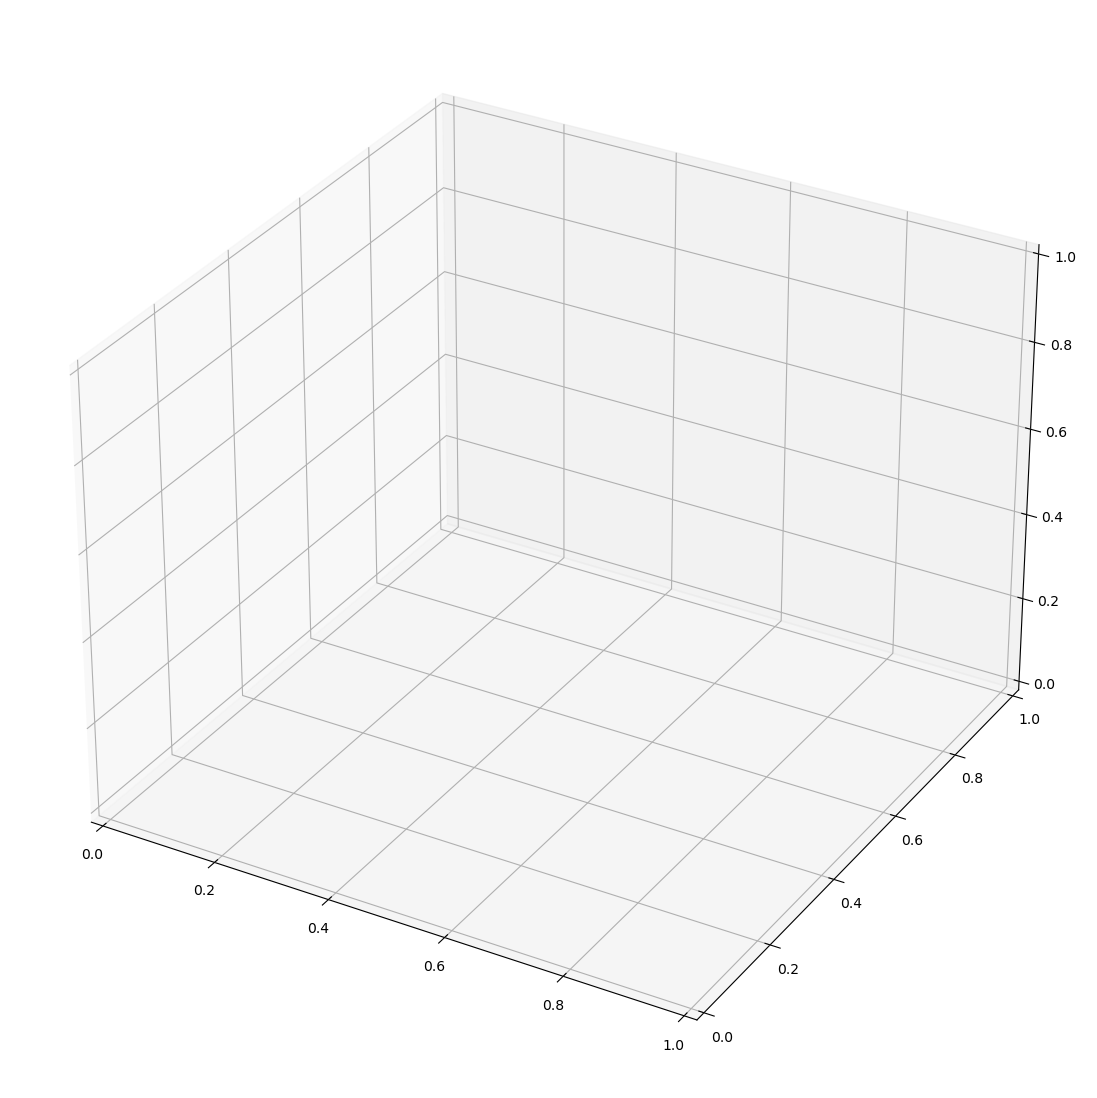

In [125]:
'''윗 장 대충 해본거'''

Y_T = np.linspace(100, 150, 11)
B_T = np.linspace(15, 35, 21)

pay_df = payment_dist2(Y_T, B_T, 0.2)

fig = plt.figure(figsize=(14,14), facecolor='w')
ax = fig.add_subplot(111, projection='3d')

Yen, Baht = np.meshgrid(pay_df.columns, pay_df.index)
Yen

# ax.plot_surface(Yen, Baht, pay_df, cmap='rainbow')

# ax.xaxis.set_tick_params(labelsize=16)
# ax.yaxis.set_tick_params(labelsize=16)
# ax.zaxis.set_tick_params(labelsize=16)

# ax.set_xlabel('$Y_T$', size=50, labelpad=30)
# ax.set_ylabel('$B_T$', size=50, labelpad=30)
# ax.set_zlabel('Payment(M$)', size=50, labelpad=30)

# plt.tight_layout()
# plt.show()

In [115]:
def s_t (s_0, r, r_f, T, sigma, epsilon):
    
    return 1/(1/(s_0) * np.exp((r - r_f - (sigma**2)/2) * T + sigma * epsilon * np.sqrt(T) ))

def alpha (Y_T, Y_0, B_T, B_0, multiplier):

    return max(0, (Y_T - Y_0)/Y_T) + min(1, multiplier * (B_0 - B_T)/B_T)

def payment (alpha):
    '''millions'''
    # alpha = list(alpha)
    # if len(alpha) != 0:
    #     size = len(alpha)
    #     return [53 for x in range(size)] * (np.ones(size) - [0.03 for x in range(size)] - alpha)
    # else:
    return 53 * ( 1 - 0.03 - alpha)


In [116]:
Y_0 = 122
B_0 = 25.884
cor = 0.1

s_t(Y_0, 0.05, 0.02, 1, 0.01, 0.01)

118.38843552315384

In [46]:
df

,YT,BT,alpha,payment
0,-179.444022,23.875161,2.100574,-59.920429
1,46.883955,5.980489,1.000000,-1.590000
2,169.198972,17.811736,1.278955,-16.374638
3,120.501401,11.798556,1.000000,-1.590000
4,433.798773,-40.931572,-7.443099,445.894236
...,...,...,...,...
995,-8.261835,42.523624,13.810179,-680.529499
996,407.209909,24.987066,0.879880,4.776369
997,326.268535,40.881154,-1.208163,115.442650
998,252.422577,48.201855,-1.798358,146.722954


In [2]:
def s_t_cal (S0, r_domestic, r_asset, sigma, time, epsilon):

    return 1 / ( 1/(S0) * np.exp((r_domestic - r_asset - (sigma**2/2))* time + sigma * epsilon * np.sqrt(time)) )

def c1_c2_cal (R0, R1, R2):

    c1 = 0.2015 * (R0 / R1) * 0.5
    c2 = 0.2015 * (R0 / R2) * 0.5

    return c1, c2

def F_cal (R0, R1, R2):

    return 1 * max(0, R0/R2 + 2 * ((R0 - R2)/R2)-(R1-R2)/R2)

def payment_cal (principal, c1, c2, F):

    return round(principal * c1 + principal * (c2 + F), 1)
    
R0 = 2369.5
R1 = 2615
R2 = 7650

c1 = 0.0913
c2 = 0.0312

F = F_cal(R0, R1, R2)
payment_cal(86.5, c1, c2, F)

10.6

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
r_domestic = 0.03
r_yen = 0.01
r_baht = 0.13
Y0 = 122
B0 = 25.884
T = 1
rho = 0.1


In [91]:
def ST_cal (S0, r_d, r_f, sigma, T, rho, epsilon):
    
    return 1 / (1 / S0 * np.exp((r_d - r_f - (sigma**2/2)) * T + sigma * epsilon * np.sqrt(T)))
    
def alpha_cal (YT, Y0, BT, B0, multiplier=5):

    return max(0, (YT-Y0)/YT) + min(1, multiplier * (B0-BT)/BT)

def payment_cal (alpha):

    return 53 * (1 - 0.03 - alpha)

def yen_baht_simulation (Y0, B0, r_domestic, r_yen, r_baht, T, rho, sigma_yen, sigma_baht, N=1000):
    
    epsilon_1 = np.random.standard_normal(N)
    epsilon_2 = rho * epsilon_1 + np.random.standard_normal(N)*np.sqrt((1-rho**2))

    YT = ST_cal(Y0, r_domestic, r_yen, sigma_yen, T, rho, epsilon_1)
    BT = ST_cal(B0, r_domestic, r_baht, sigma_baht, T, rho, epsilon_2)

    payment = np.array([])

    for zip_T in zip(YT, BT):
        payment = np.append(payment, payment_cal(alpha_cal(zip_T[0], Y0, zip_T[1], B0)))

    return round(payment.mean() * np.exp(-r_domestic * T), 2)

sigmaB              0.01   0.05   0.10   0.20   0.30   0.50    0.60
multiplier sigmaY                                                  
5          0.01    74.35  74.39  73.99  76.21  81.31  97.82  106.47
           0.05    73.77  73.65  73.83  75.74  81.14  97.27  106.63
           0.10    72.76  72.78  72.58  75.16  80.11  95.77  104.90
           0.20    70.73  70.69  70.81  72.72  78.60  94.59  103.74
           0.30    68.65  68.72  68.86  70.56  76.11  92.40  101.57
           0.50    64.61  64.51  64.52  66.81  71.88  88.23   97.11

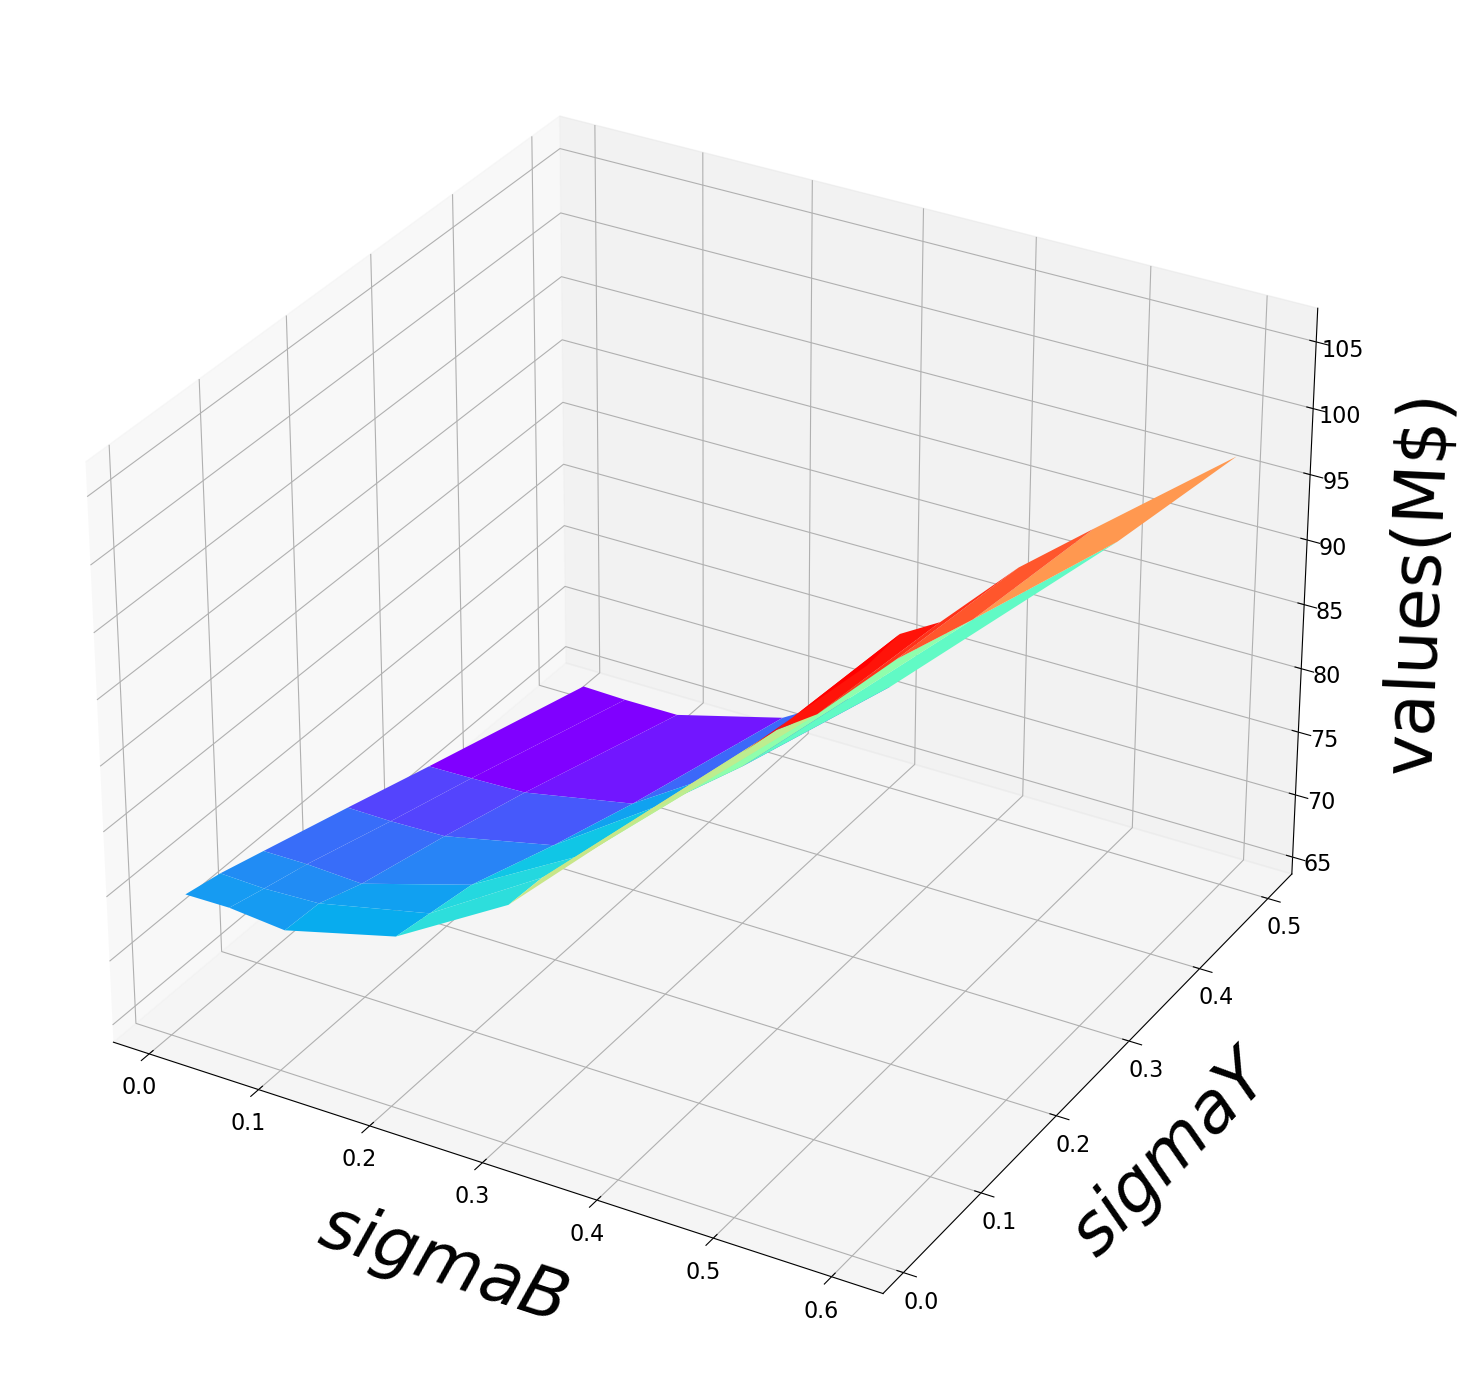

In [134]:
r_domestic = 0.03
r_yen = 0.01
r_baht = 0.13
Y0 = 122
B0 = 25.884
T = 1
rho = 0.2

sigma_baht_list = [0.01, 0.05, 0.10, 0.20, 0.30, 0.50, 0.60]
sigma_yen_list = [0.01, 0.05, 0.10, 0.20, 0.30, 0.50]

result_df = pd.DataFrame(index=[[5 for x in sigma_yen_list], sigma_yen_list], columns=sigma_baht_list)
result_df.index = pd.MultiIndex.from_tuples(result_df.index, names=('multiplier', 'sigmaY'))
result_df.columns.names = ['sigmaB']

for sigma_baht in sigma_baht_list:
    values = []
    for sigma_yen in sigma_yen_list:
        value = yen_baht_simulation(Y0, B0, r_domestic, r_yen, r_baht, T, rho=rho, sigma_yen=sigma_yen, sigma_baht=sigma_baht, N=50000)
        values.append(value)
        #print(f'sigma_baht({sigma_baht}), sigma_yen({sigma_yen}) = {value}')
    #print(f'sigma_baht : {sigma_baht} and {values}')
    result_df[sigma_baht] = values
        
display(result_df)

fig = plt.figure(figsize=(14,14), facecolor='w')
ax = fig.add_subplot(111, projection='3d')

sigmaB, sigmaY = np.meshgrid(result_df.columns.to_list(), result_df.index.get_loc_level(5)[1].to_list())
ax.plot_surface(sigmaB, sigmaY, result_df, cmap='rainbow')

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.zaxis.set_tick_params(labelsize=16)

ax.set_xlabel('$sigmaB$', size=50, labelpad=30)
ax.set_ylabel('$sigmaY$', size=50, labelpad=30)
ax.set_zlabel('values(M$)', size=50, labelpad=30)

plt.tight_layout()
plt.show()

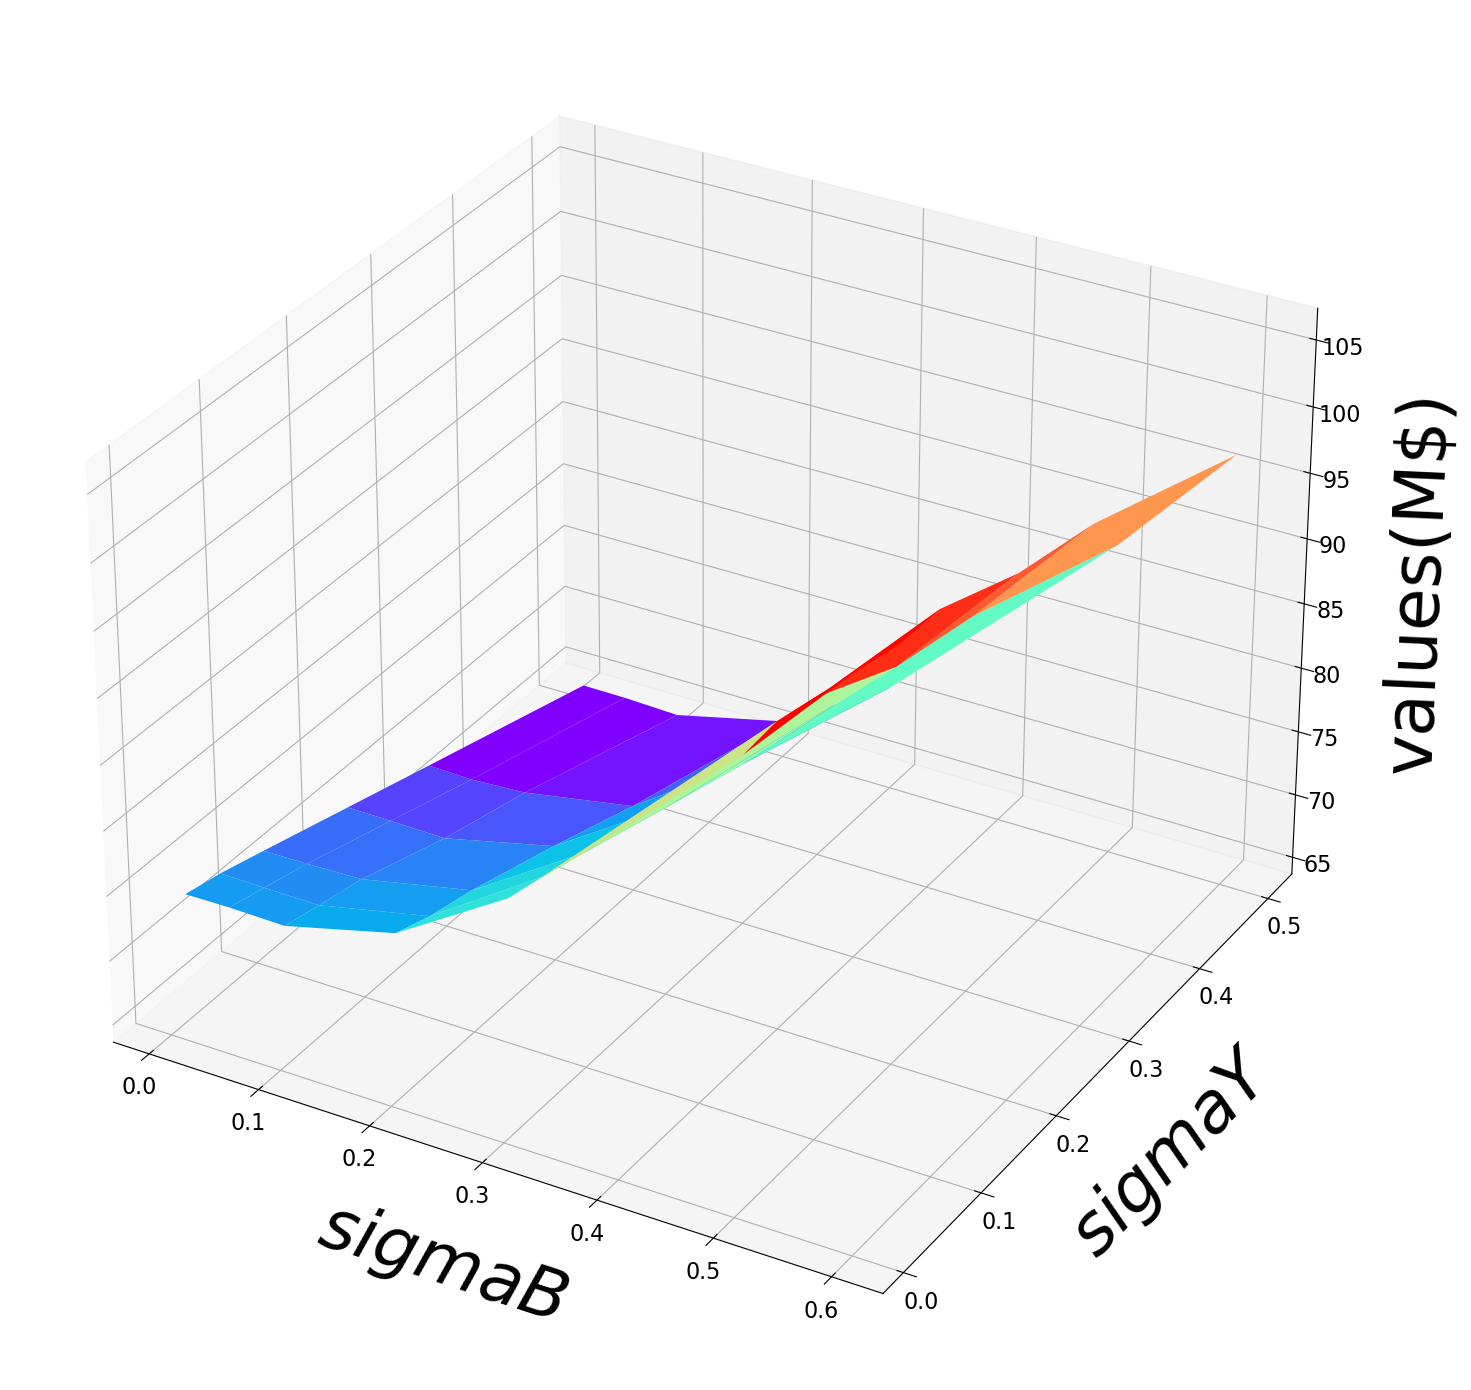

In [128]:
fig = plt.figure(figsize=(14,14), facecolor='w')
ax = fig.add_subplot(111, projection='3d')

sigmaB, sigmaY = np.meshgrid(result_df.columns.to_list(), result_df.index.get_loc_level(5)[1].to_list())
ax.plot_surface(sigmaB, sigmaY, result_df, cmap='rainbow')

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.zaxis.set_tick_params(labelsize=16)

ax.set_xlabel('$sigmaB$', size=50, labelpad=30)
ax.set_ylabel('$sigmaY$', size=50, labelpad=30)
ax.set_zlabel('values(M$)', size=50, labelpad=30)

plt.tight_layout()
plt.show()